# Kai's FastAI Dog Breed Identifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [3]:
bs = 32

In [4]:
path = Path('../data/dog-breed-identification/')

In [ ]:
data_train = (
    ImageDataBunch.from_csv(path=path, folder='train', 
                            csv_labels='labels.csv', suffix='.jpg', size=224, bs=bs).
    normalize(imagenet_stats)
)

In [5]:
data = (
   ImageDataBunch.from_csv(path=path, folder='train', test='test', 
                           csv_labels='labels.csv', suffix='.jpg', size=224, 
                           bs=bs, valid_pct=0.2)
)

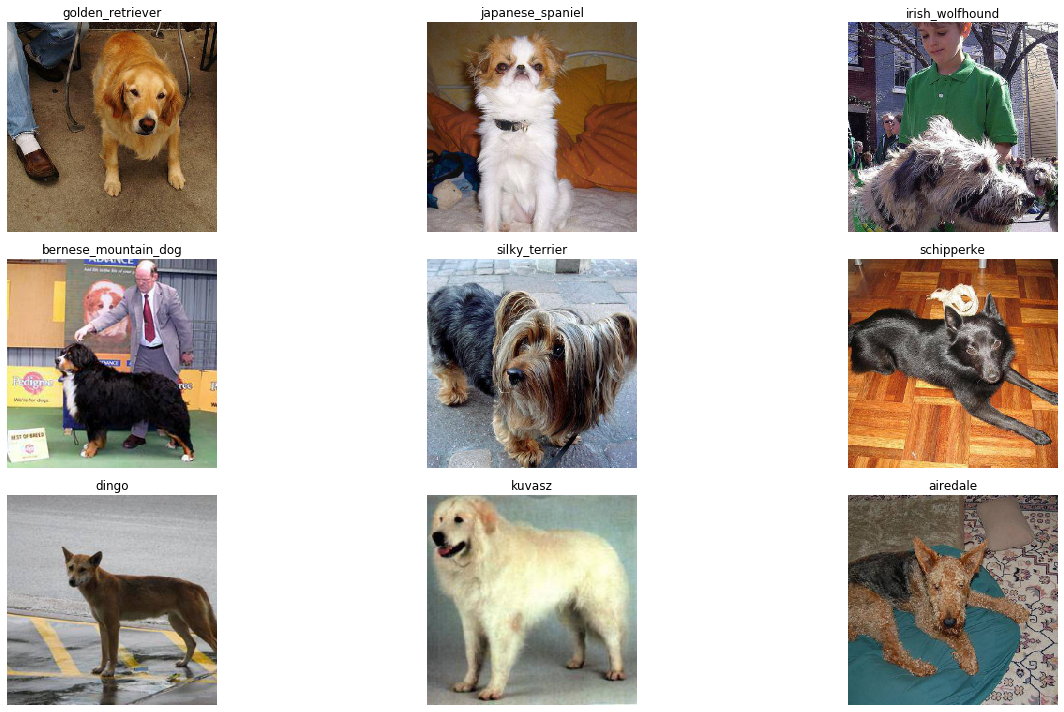

In [6]:
data.show_batch(rows=3, figsize=(20, 10))

In [7]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (8178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boston_bull,dingo,pekinese,bluetick,golden_retriever
Path: ../data/dog-breed-identification;

Valid: LabelList (2044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
norfolk_terrier,otterhound,saluki,ibizan_hound,keeshond
Path: ../data/dog-breed-identification;

Test: LabelList (10357 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/dog-breed-identification

In [8]:
print(data.classes)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

## Get Model and Train: resnet50

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [11]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.511758,0.772086,0.217710,00:43
1,1.054253,0.691863,0.192270,00:40
2,0.864020,0.699969,0.183953,00:40
3,0.737541,0.613739,0.173679,00:40
4,0.473303,0.585847,0.158023,00:40
5,0.284704,0.582081,0.157045,00:40
6,0.167580,0.552520,0.140411,00:40
7,0.134921,0.535675,0.137476,00:40


In [12]:
learn.save('stage-1-50')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

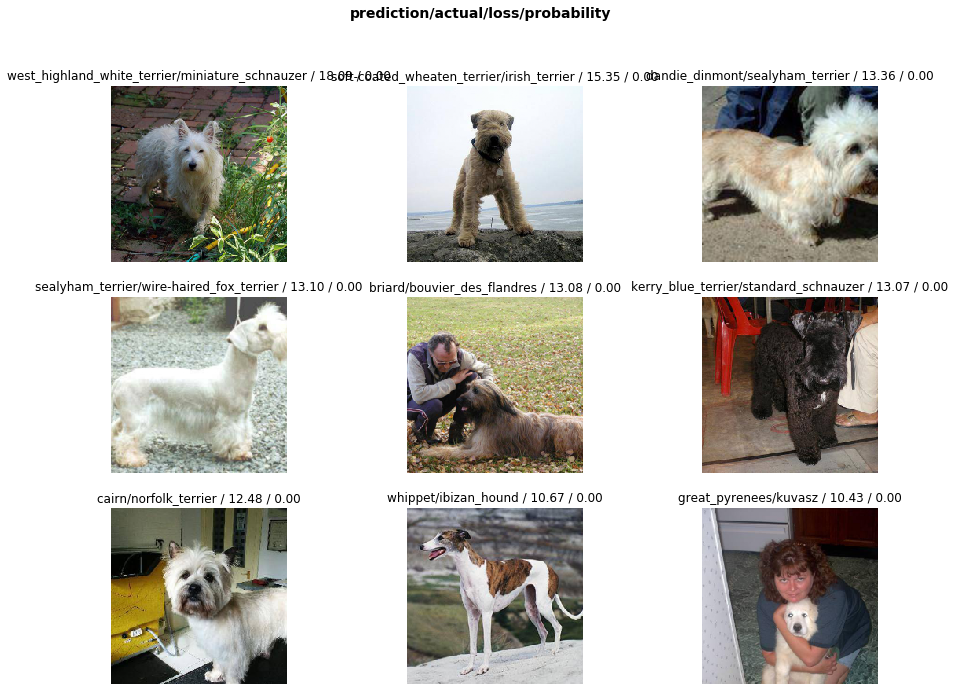

In [15]:
interp.plot_top_losses(9, figsize=(15, 11))

In [16]:
interp.most_confused(min_val=2)

[('eskimo_dog', 'siberian_husky', 7),
 ('miniature_poodle', 'toy_poodle', 7),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 4),
 ('silky_terrier', 'yorkshire_terrier', 4),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 4),
 ('wire-haired_fox_terrier', 'lakeland_terrier', 4),
 ('eskimo_dog', 'malamute', 3),
 ('italian_greyhound', 'whippet', 3),
 ('newfoundland', 'tibetan_mastiff', 3),
 ('norfolk_terrier', 'norwich_terrier', 3),
 ('walker_hound', 'english_foxhound', 3),
 ('appenzeller', 'border_collie', 2),
 ('appenzeller', 'greater_swiss_mountain_dog', 2),
 ('australian_terrier', 'silky_terrier', 2),
 ('bloodhound', 'rhodesian_ridgeback', 2),
 ('bouvier_des_flandres', 'briard', 2),
 ('english_setter', 'welsh_springer_spaniel', 2),
 ('german_short-haired_pointer', 'bluetick', 2),
 ('golden_retriever', 'labrador_retriever', 2),
 ('gordon_setter', 'black-and-tan_coonhound', 2),
 ('ibizan_hound', 'whippet', 2),
 ('italian_greyhound', 'mexican_hairless', 

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


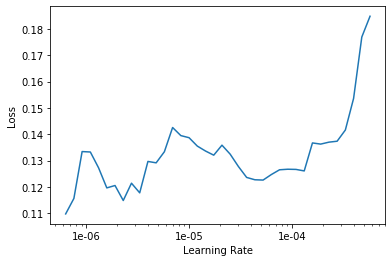

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.129090,0.563447,0.151663,00:54
1,0.120144,0.554872,0.144325,00:55
2,0.082201,0.543605,0.141879,00:54


In [21]:
learn.save('stage-1-50')

## Run on Test

In [31]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [32]:
preds

tensor([[3.5766e-07, 4.2777e-05, 3.7576e-03,  ..., 1.3136e-05, 1.9693e-06,
         1.0395e-06],
        [1.5668e-07, 1.3914e-08, 8.5375e-09,  ..., 3.0942e-09, 2.5225e-09,
         2.4978e-07],
        [2.8110e-09, 2.4161e-08, 1.0176e-08,  ..., 5.9101e-07, 1.1198e-06,
         1.7558e-10],
        ...,
        [4.7075e-08, 9.5628e-09, 1.2811e-08,  ..., 8.2211e-07, 2.8491e-08,
         1.9484e-10],
        [1.9920e-06, 1.5381e-05, 7.1866e-08,  ..., 2.5544e-09, 1.1116e-08,
         1.6933e-07],
        [2.8076e-07, 4.0901e-05, 1.0761e-06,  ..., 2.4441e-03, 6.4919e-06,
         1.9515e-06]])

In [33]:
preds.shape

torch.Size([10357, 120])

In [38]:
dataframes = []
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > 0.2]) for pred in preds]
fnames = [f.name[:-4] for f in learn.data.test_ds.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
dataframes.append(df)

In [39]:
df = pd.concat(dataframes)

,image_name,tags
0,ef69016a79094a8bd47f42ccc14ba63a,tibetan_mastiff
1,13e8727d23e2bb8c8f453379edb2e93e,pomeranian
2,b0c5944458dafe3ba68b7021da55fb12,borzoi
3,dd7fbb397a4968d9ae54d1d7b7a35ae6,redbone
4,ab354dfce3ed05f9260d1eea76a16c8e,borzoi
...,...,...
10352,e9b16b4bdf5b0561fc7c69b2f36e1a7e,beagle
10353,ba2e4f5524afd4383ef430a998e6ad54,papillon
10354,0552e89f6c0ffaaf0de95ee3fc40d68f,eskimo_dog siberian_husky
10355,f1230a99088c9bc88bc2989affee43d2,cocker_spaniel


In [89]:
file = 'output'

with open(file, 'a') as f:
    for i, pred in enumerate(preds):
        f.write(fnames[i] + ',')
        for j, value in enumerate(pred):
            if j != 119:
                f.write(str(np.round(np.float(value), 12)) + ",")
            else:
                f.write(str(np.round(np.float(value), 12)))
        f.write('\n')

In [83]:
preds[0].shape

torch.Size([120])

In [90]:
learn.TTA(is_test=True)

TypeError: _TTA() got an unexpected keyword argument 'is_test'